# Big Mart Sales - EDA

In [1]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/ExternalAssignments/Big_Mart_Sales/Dataset/')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [107]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import pandas_profiling
#import pickle

In [142]:
train_dataset = pd.read_csv ('Train.csv', na_values={'Item_Visibility':[0]})
test_dataset = pd.read_csv ('Test.csv', na_values={'Item_Visibility':[0]})
train_dataset.shape

(8523, 12)

In [109]:
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [110]:
#Let do profiling of the dataset
pfr = pandas_profiling.ProfileReport(train_dataset)
pfr.to_file("Big Mart Training Data Profiling.html")
pfr

Number of variables,12
Number of observations,8523
Total Missing (%),4.3%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [111]:
train_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7997.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.643456,0.050308,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.031403,93.826500,1987.000000,834.247400
50%,12.600000,0.057792,143.012800,1999.000000,1794.331000
75%,16.850000,0.098109,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [112]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              7997 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


### Imputing Missing Values

In [113]:
train_dataset[train_dataset.columns[train_dataset.isnull().any()]].isnull().sum()

Item_Weight        1463
Item_Visibility     526
Outlet_Size        2410
dtype: int64

In [114]:
# imputing missing data
train_dataset['Item_Weight'].fillna(train_dataset['Item_Weight'].mean(), inplace = True)
train_dataset['Item_Visibility'].fillna(train_dataset['Item_Visibility'].median(), inplace = True)
train_dataset['Outlet_Size'].fillna("Medium", inplace = True)

test_dataset['Item_Weight'].fillna(test_dataset['Item_Weight'].mean(), inplace = True)
test_dataset['Item_Visibility'].fillna(test_dataset['Item_Visibility'].median(), inplace = True)
test_dataset['Outlet_Size'].fillna("Medium", inplace = True)


### Univariate Analysis

#### Distribution of the target variable: Item_Outlet_Sales

Text(0.5,1,'Item_Outlet_Sales Distribution')

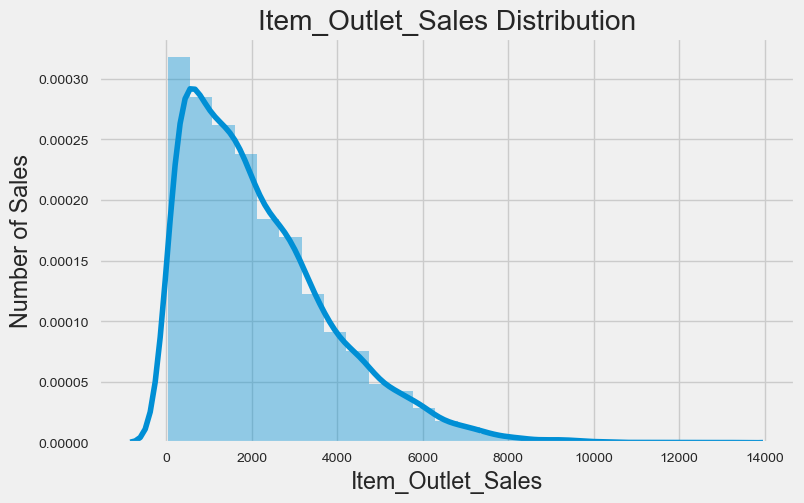

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(train_dataset.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [116]:
print ("Skew is:", train_dataset.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train_dataset.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000217B32E8>,
      dtype=object)

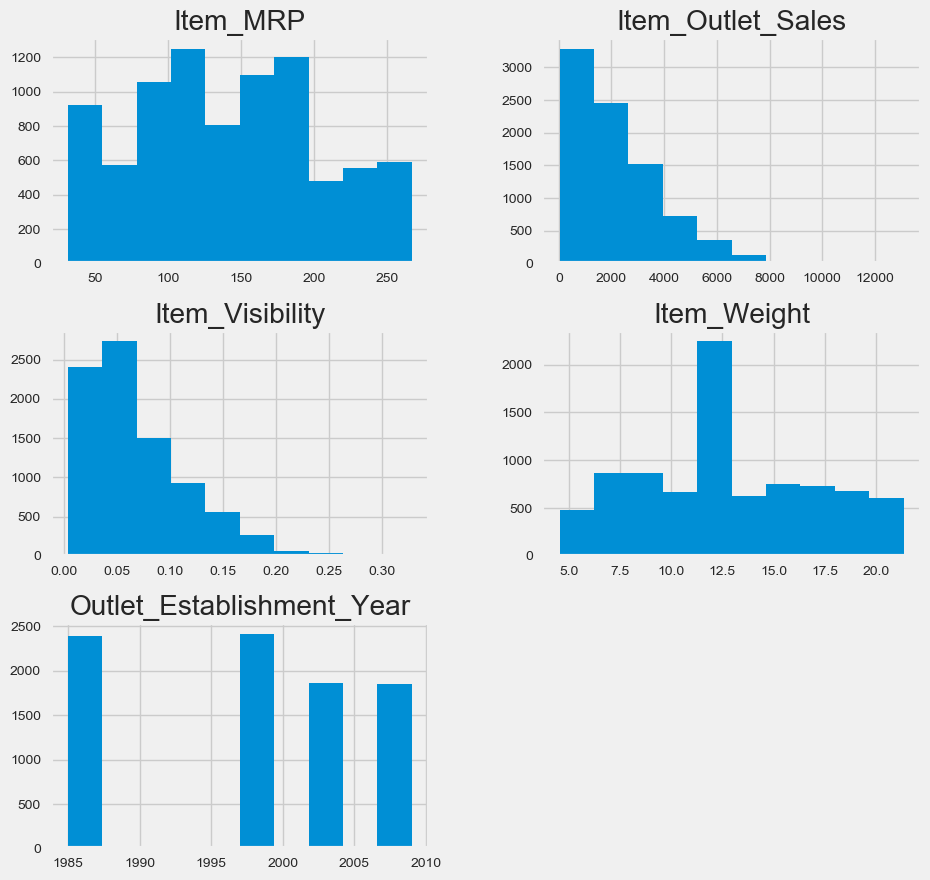

In [117]:
train_dataset[train_dataset.dtypes[(train_dataset.dtypes=="float64")|(train_dataset.dtypes=="int64")]
                        .index.values].hist(figsize=[10,10])


#### Correlation between Numerical Predictors and Target variable

In [118]:
numeric_features = train_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()
corr


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016829,0.024756,-0.008301,0.011550
Item_Visibility,-0.016829,1.000000,-0.004763,-0.078328,-0.134161
Item_MRP,0.024756,-0.004763,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078328,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134161,0.567574,-0.049135,1.000000


In [119]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.134161
Name: Item_Outlet_Sales, dtype: float64


### Categorical Predictors

Text(0.5,1,'Distribution of the variable Outlet_Type')

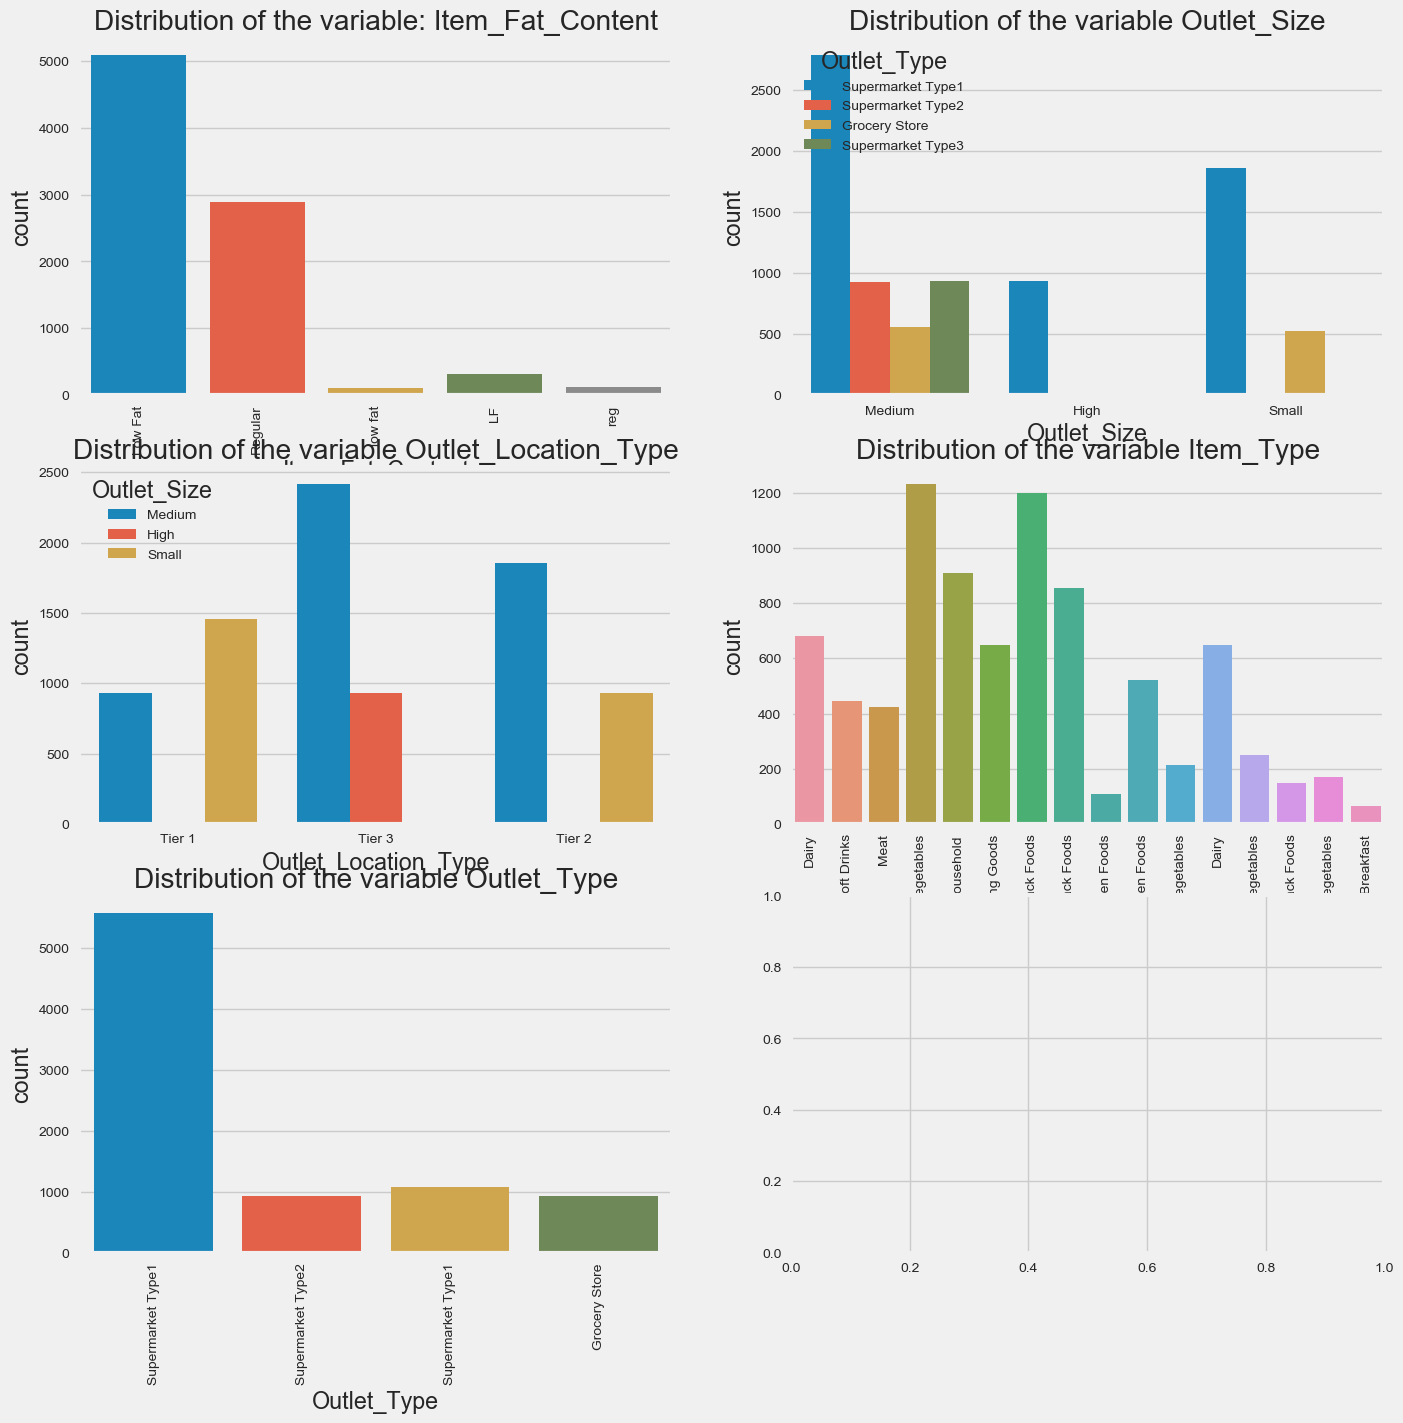

In [120]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

sns.countplot(x="Item_Fat_Content", data = train_dataset, ax=ax1)
ax1.set_xticklabels(train_dataset['Item_Fat_Content'].unique(), rotation=90)
ax1.set_title('Distribution of the variable: Item_Fat_Content')

sns.countplot(x="Outlet_Size", data = train_dataset, hue = 'Outlet_Type', ax=ax2)
ax2.set_title('Distribution of the variable Outlet_Size')


sns.countplot(x="Outlet_Location_Type", data = train_dataset, hue = 'Outlet_Size', ax=ax3)
ax3.set_title('Distribution of the variable Outlet_Location_Type')

sns.countplot(x="Item_Type", data = train_dataset, ax=ax4)
ax4.set_xticklabels(train_dataset.Item_Type, rotation=90)
ax4.set_title('Distribution of the variable Item_Type')

sns.countplot(x="Outlet_Type", data = train_dataset, ax=ax5)
ax5.set_xticklabels(train_dataset.Outlet_Type, rotation=90)
ax5.set_title('Distribution of the variable Outlet_Type')

([<matplotlib.patches.Wedge at 0x21667898>,
 [Text(1.06662,0.26891,'Supermarket Type1'),
  Text(-1.18351,0.198262,'Supermarket Type2'),
  Text(1.00754,-0.44144,'Grocery Store'),
  Text(1.1,-1.02989e-07,'Supermarket Type3')],
 [Text(0.581795,0.146678,'7.9%'),
  Text(-0.69038,0.115653,'79.0%'),
  Text(0.549566,-0.240786,'13.1%'),
  Text(0.6,-5.61761e-08,'0.0%')])

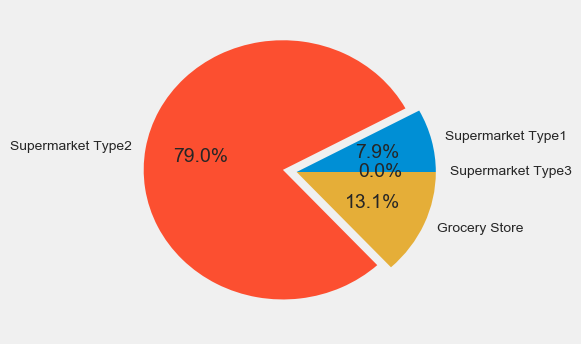

In [150]:
plt.figure(figsize=(4,4))
values = train_dataset.groupby('Outlet_Type')['Item_Weight'].count()
slices = train_dataset.Outlet_Type.unique()
plt.pie(values, labels = slices, explode = (0,0.1,0,0), autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x1fbcb518>,
 [Text(0.744251,0.809994,'Tier 1'),
  Text(-1.06662,0.26891,'Tier 3'),
  Text(0.57126,-1.0553,'Tier 2')],
 [Text(0.405955,0.441815,'26.3%'),
  Text(-0.581795,0.146678,'39.4%'),
  Text(0.333235,-0.615593,'34.2%')])

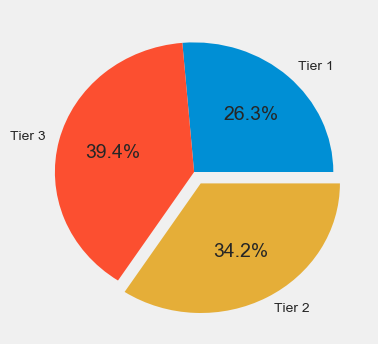

In [149]:
plt.figure(figsize=(4,4))
values = train_dataset.groupby('Outlet_Location_Type')['Item_Weight'].count()
slices = train_dataset.Outlet_Location_Type.unique()
plt.pie(values, labels = slices, explode = (0,0,0.1), autopct = '%1.1f%%')

### Bivariate Analysis

Text(0.5,1,'Item_Visibility and Item_Outlet_Sales Analysis')

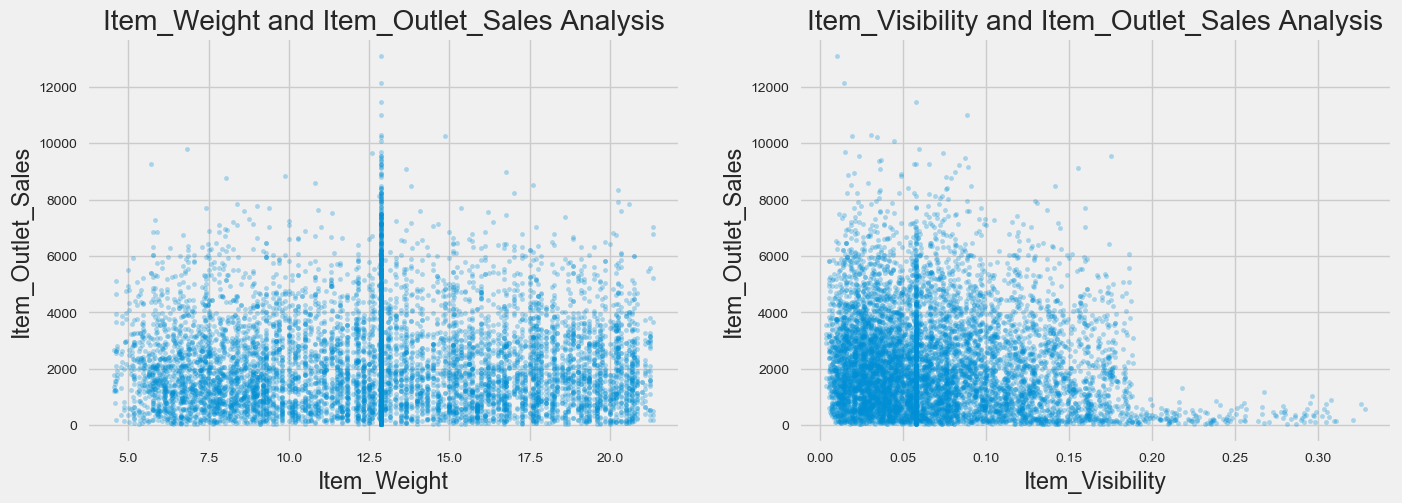

In [121]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(train_dataset.Item_Weight, train_dataset["Item_Outlet_Sales"],'.', alpha = 0.3)
ax1.set_xlabel('Item_Weight')
ax1.set_ylabel('Item_Outlet_Sales')
ax1.set_title('Item_Weight and Item_Outlet_Sales Analysis')

ax2.plot(train_dataset.Item_Visibility, train_dataset['Item_Outlet_Sales'],'.', alpha = 0.3)
ax2.set_xlabel('Item_Visibility')
ax2.set_ylabel('Item_Outlet_Sales')
ax2.set_title('Item_Visibility and Item_Outlet_Sales Analysis')

Text(0.5,1,'Impact of Outlet_Location_Type on Item_Outlet_Sales')

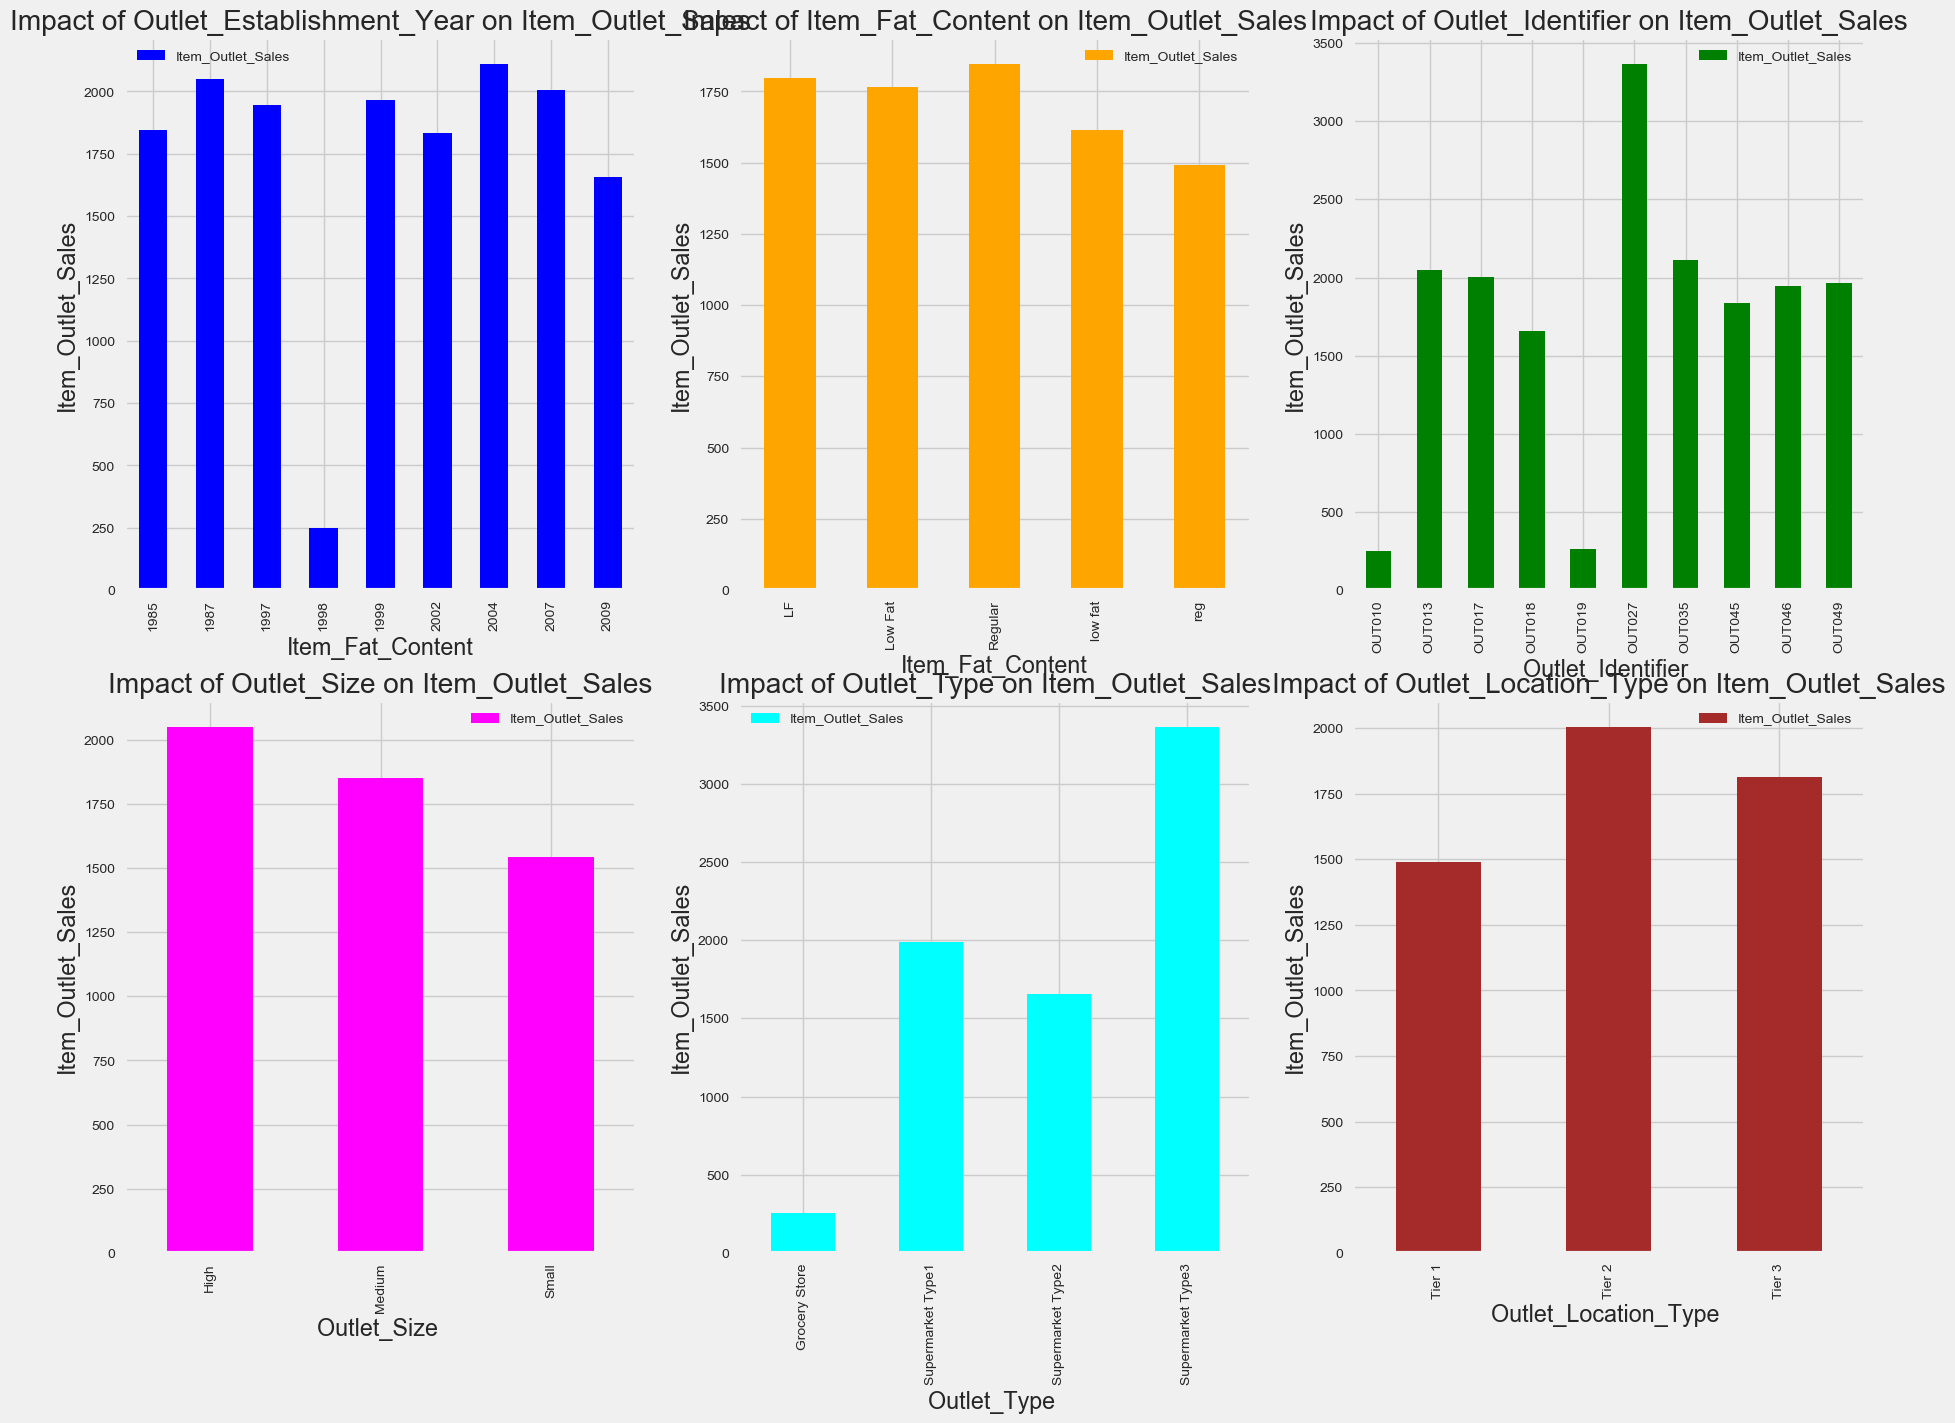

In [124]:
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

Outlet_Establishment_Year_pivot = train_dataset.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Impact of Outlet_Establishment_Year on Item_Outlet_Sales')
ax1.set_xlabel("Item_Fat_Content")
ax1.set_ylabel("Item_Outlet_Sales")

Item_Fat_Content_pivot = train_dataset.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='orange', ax=ax2)
ax2.set_xlabel("Item_Fat_Content")
ax2.set_ylabel("Item_Outlet_Sales")
ax2.set_title("Impact of Item_Fat_Content on Item_Outlet_Sales")

Outlet_Identifier_pivot = train_dataset.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='green', ax=ax3)
ax3.set_xlabel('Outlet_Identifier ')
ax3.set_ylabel('Item_Outlet_Sales')
ax3.set_title('Impact of Outlet_Identifier on Item_Outlet_Sales')

Outlet_Size_pivot = train_dataset.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='magenta',ax=ax4)
ax4.set_xlabel('Outlet_Size ')
ax4.set_ylabel('Item_Outlet_Sales')
ax4.set_title('Impact of Outlet_Size on Item_Outlet_Sales')

Outlet_Type_pivot = train_dataset.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='cyan',ax=ax5)
ax5.set_xlabel("Outlet_Type ")
ax5.set_ylabel("Item_Outlet_Sales")
ax5.set_title("Impact of Outlet_Type on Item_Outlet_Sales")

Outlet_Location_Type_pivot = train_dataset.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='brown',ax=ax6)
ax6.set_xlabel("Outlet_Location_Type ")
ax6.set_ylabel("Item_Outlet_Sales")
ax6.set_title("Impact of Outlet_Location_Type on Item_Outlet_Sales")

### Categorical Variables

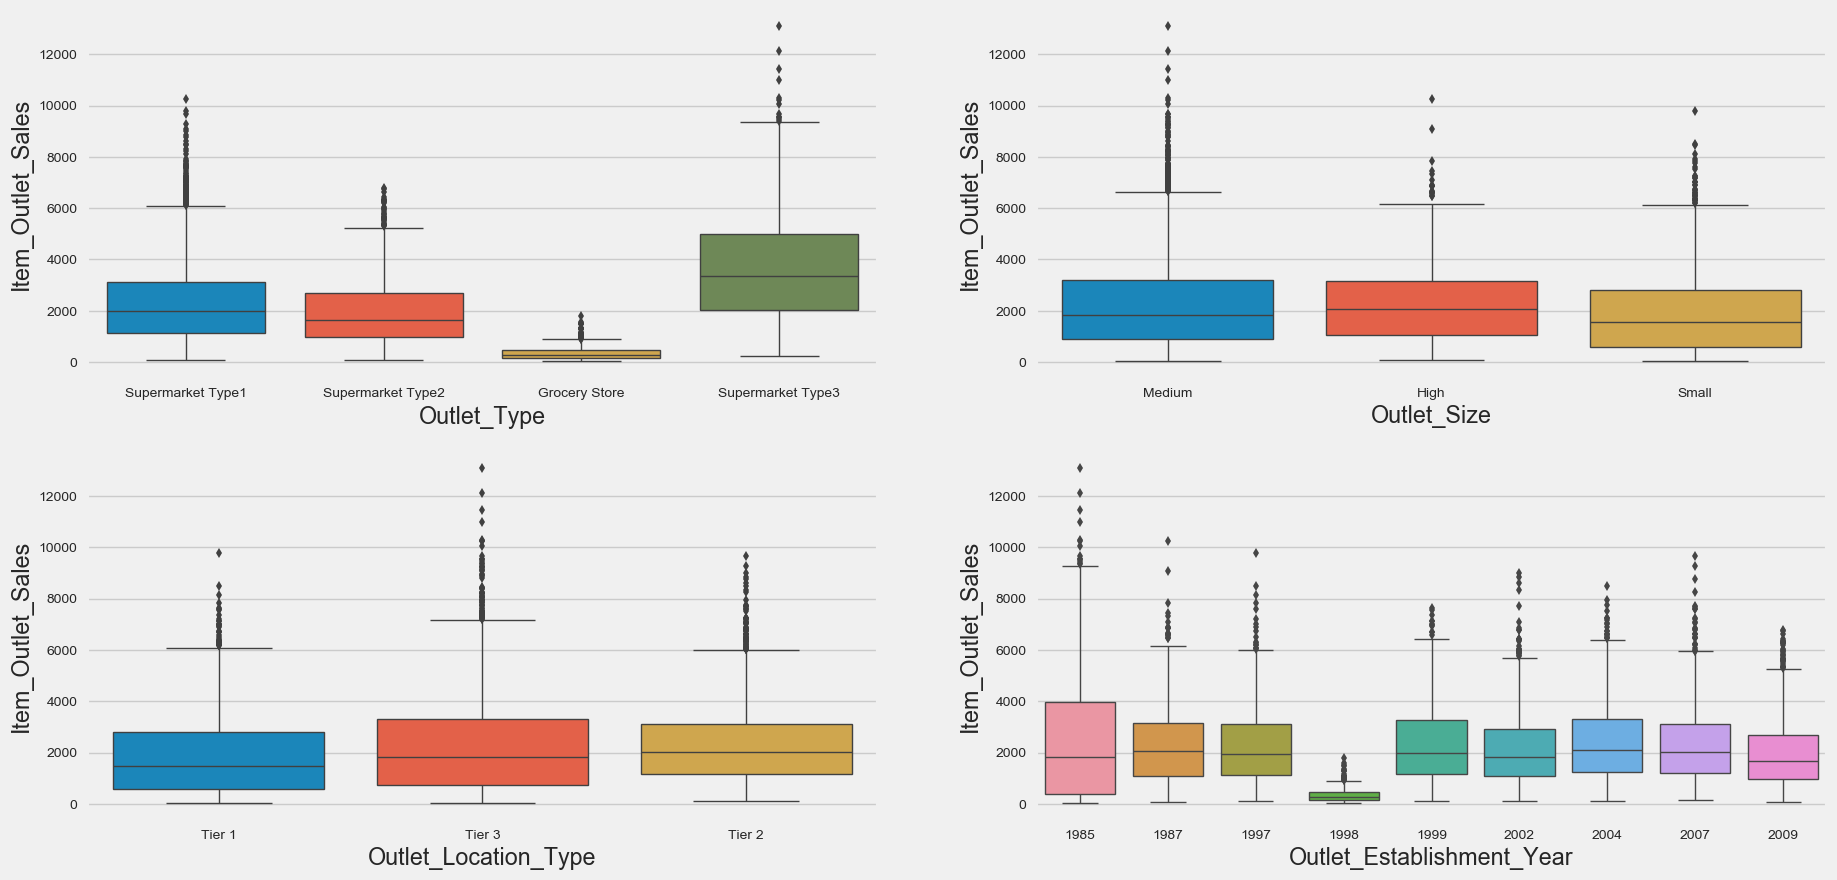

In [125]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.boxplot(x ='Outlet_Type', y='Item_Outlet_Sales', data = train_dataset, linewidth = 1, ax = ax1)
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales',  data = train_dataset, linewidth = 1, ax = ax2)
sns.boxplot(x ='Outlet_Location_Type', y='Item_Outlet_Sales', data = train_dataset, linewidth = 1, ax = ax3)
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales',  data = train_dataset, linewidth = 1, ax = ax4)

In [126]:
train_dataset.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [127]:
train_dataset.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [128]:
train_dataset.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


## Feature Engineering

In [129]:
#Combine the train and test dataset
display(train_dataset.shape)
output_column = train_dataset[['Item_Identifier', 'Item_Outlet_Sales']]
display(output_column.shape)
#combined_dataset = train_dataset.drop(['Item_Outlet_Sales'], axis=1).append(test_dataset, ignore_index=True)
combined_dataset = train_dataset.append(test_dataset, ignore_index=True)
display(combined_dataset.head())


(8523, 12)

(8523, 2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057792,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.057792,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [130]:
# dictionary to replace the categories
fat_content_dict = {'Low Fat':0, 'Regular':1, 'LF':0, 'reg':1, 'low fat':0}
combined_dataset['Item_Fat_Content'] = combined_dataset['Item_Fat_Content'].replace(fat_content_dict, regex=True)
combined_dataset['Visibility_per_unit_price'] = combined_dataset.Item_Visibility/combined_dataset.Item_MRP
combined_dataset['Outlet_Age'] = 2018 - combined_dataset.Outlet_Establishment_Year

In [131]:
combined_dataset.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Visibility_per_unit_price', 'Outlet_Age'],
      dtype='object')

In [132]:
combined_dataset.Outlet_Size = combined_dataset.Outlet_Size.astype('category', categories  = ['Missing', 'Small', 'Medium', \
                                                                                              'High'], ordered = True)
combined_dataset.Outlet_Location_Type = combined_dataset.Outlet_Location_Type.astype('category', categories  = ['Tier 1', \
                                                                                'Tier 2', 'Tier 3'], ordered = True)
combined_dataset.Outlet_Type_Numeric = combined_dataset['Outlet_Type'].map({'Supermarket Type1' : 1, 'Supermarket Type2' : \
                                                                        2, 'Supermarket Type3' : 3, 'Grocery Store' : 4})
#combined_dataset.Outlet_Type = combined_dataset.Outlet_Type.astype('category', categories  = ['Grocery Store', \
#                                            'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], ordered = True)

combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
Item_Fat_Content             14204 non-null int64
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null category
Outlet_Size                  14204 non-null category
Outlet_Type                  14204 non-null object
Visibility_per_unit_price    14204 non-null float64
Outlet_Age                   14204 non-null int64
dtypes: category(2), float64(5), int64(3), object(4)
memory usage: 1.3+ MB


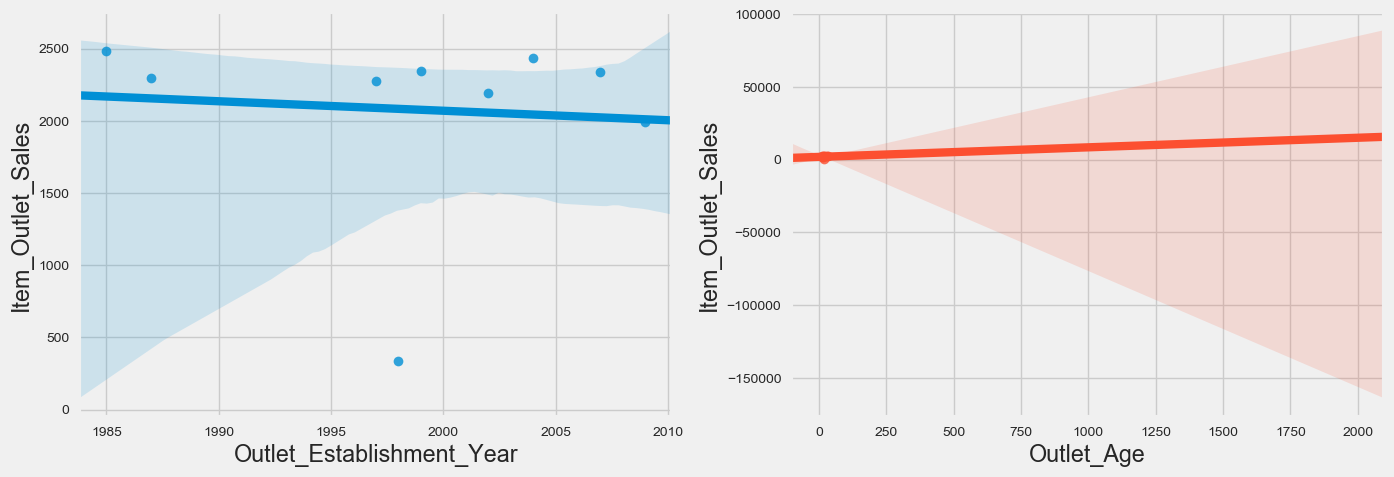

In [133]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
salesVsEstablished = combined_dataset[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').mean().reset_index()
sns.regplot(x=salesVsEstablished.Outlet_Establishment_Year,y = salesVsEstablished.Item_Outlet_Sales, scatter= True, fit_reg=True, ax=ax1)

salesVsAge = combined_dataset[['Outlet_Age', 'Item_Outlet_Sales']].groupby('Outlet_Age').mean().reset_index()
sns.regplot(x=salesVsAge.Outlet_Age,y = salesVsAge.Item_Outlet_Sales, scatter= True, fit_reg=True, ax=ax2)

In [134]:
mrp_bin = [0, 100, 200, 300]
bin_labels = ['Low', 'Medium', 'High']
combined_dataset['MRP_Category'] = pd.cut(combined_dataset['Item_MRP'], bins = mrp_bin, labels = bin_labels, right = True)
#combined_dataset.drop('Item_MRP', axis = 1, inplace = True)

age_bin = [0, 10, 20, 30, 40]
bin_labels = ['Low', 'Moderate', 'Old', 'Very_Old']
combined_dataset['Age_Bin'] = pd.cut(combined_dataset['Outlet_Age'], bins = age_bin, labels = bin_labels, right = True)
combined_dataset.drop('Outlet_Age', axis = 1, inplace = True)

In [135]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null int64
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null category
Outlet_Size                  14204 non-null category
Outlet_Type                  14204 non-null object
Visibility_per_unit_price    14204 non-null float64
MRP_Category                 14204 non-null category
Age_Bin                      14204 non-null category
dtypes: category(4), float64(5), int64(2), object(4)
memory usage: 1.2+ MB


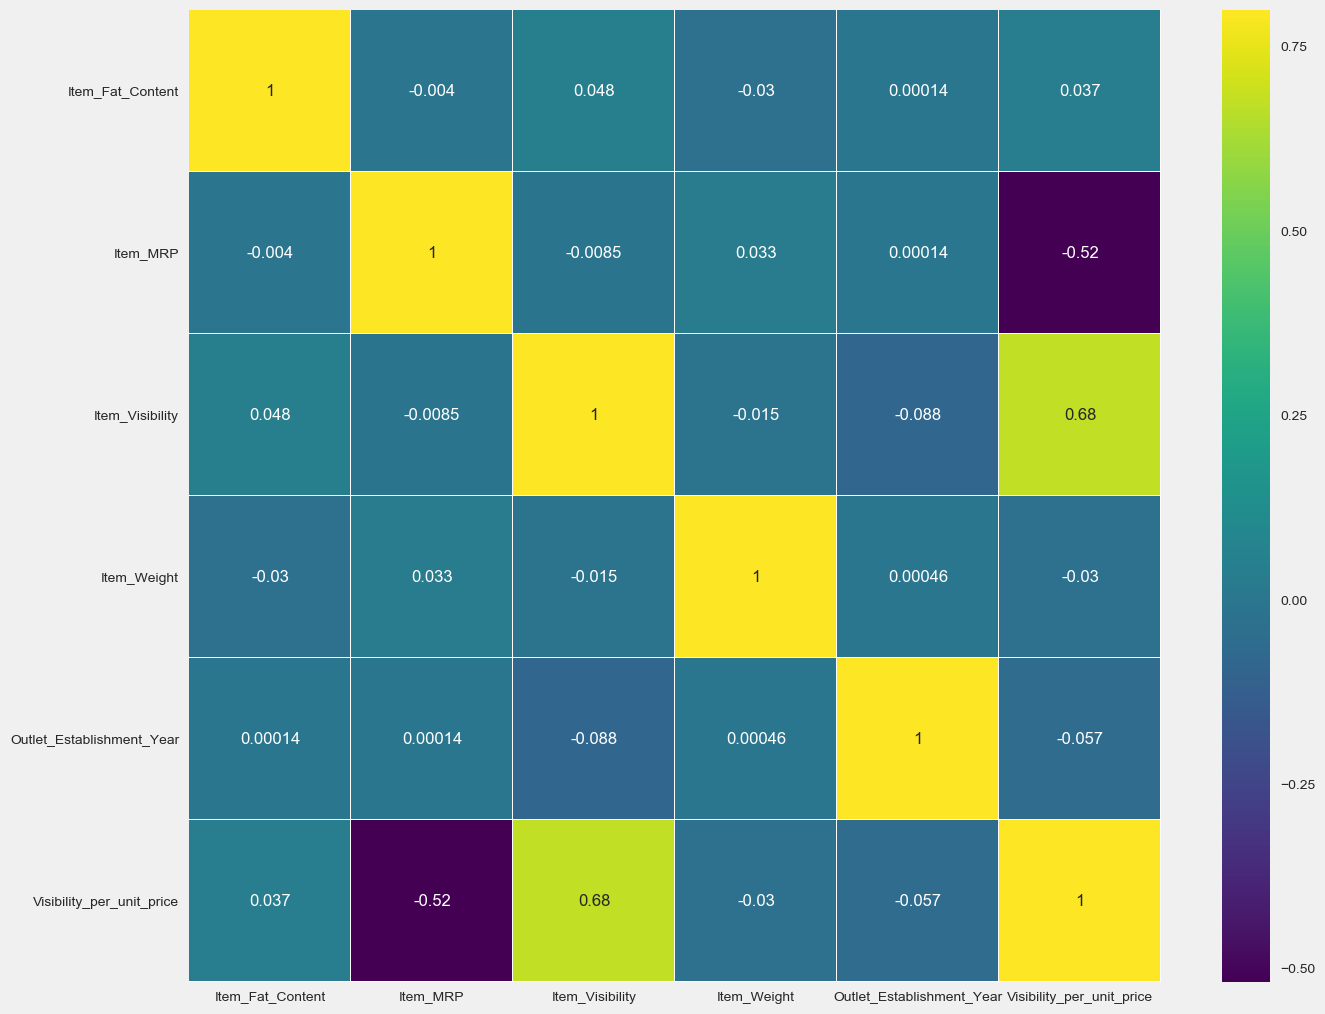

In [136]:
k= combined_dataset.select_dtypes(include=[np.number]).columns.size
correlation = combined_dataset.drop('Item_Outlet_Sales', axis = 1).select_dtypes(include=[np.number]).corr()
#Build correlation matrix for target variable
cols = correlation.index
cm = np.corrcoef(combined_dataset[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
 linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)


In [137]:
item_outlet_identifier = combined_dataset[['Item_Identifier', 'Outlet_Identifier']]
temp = combined_dataset.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
col_str = temp.columns[(temp.dtypes == object) | (temp.dtypes == 'category')]
combined_dataset = pd.get_dummies(combined_dataset, columns = col_str, drop_first = True)
#combined_dataset['Item_Identifier'] = item_outlet_identifier.Item_Identifier
#combined_dataset['Outlet_Identifier'] = item_outlet_identifier.Outlet_Identifier
combined_dataset['Outlet_Identifier'] = item_outlet_identifier.Outlet_Identifier
combined_dataset.columns
 

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Visibility_per_unit_price', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_Small',
       'Outlet_Size_Medium', 'Outlet_Size_High',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'MRP_Category_Medium',
       'MRP_Category_High', 'Age_Bin_Moderate', 'Age_Bin_Old',
       'Age_Bin_Very_Old'],
      dtype='object')

In [138]:
train_dataset.shape, output_column.shape

((8523, 12), (8523, 2))

In [139]:
# Output the Dataframe into a CSV file
train_dataset = combined_dataset.iloc[:train_dataset.shape[0],]
#train_dataset['Item_Outlet_Sales'] = output_column.Item_Outlet_Sales
test_dataset = combined_dataset.iloc[train_dataset.shape[0]:,].drop('Item_Outlet_Sales', axis = 1)
train_dataset.to_csv('train_EDA.csv',  index = False)
test_dataset.to_csv('test_EDA.csv',  index = False)

In [140]:
train_dataset.to_pickle('train_model.pkl')
test_dataset.to_pickle('test_model.pkl')